     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


[INFO] Starting Chromium download.
INFO:pyppeteer.chromium_downloader:Starting Chromium download.
100%|██████████| 183M/183M [00:01<00:00, 150Mb/s]
[INFO] Beginning extraction
INFO:pyppeteer.chromium_downloader:Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205
INFO:pyppeteer.chromium_downloader:Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205


Each year, the Delivery Body provides potential Capacity Market participants with details of the key Capacity Market implementation activities and milestones through this Operational Plan. Following the successful implementation of the Capacity Market since 2014, the Operational Plan sets out the activities and milestones required to operate the Capacity Market in 2024/25. The scope of this plan is to identify the key dates.  

Agreement Management milestones are not covered in detail in this document. However, slide 12 signposts how to find support in this area.   

The timeline for operation of the 2024/25 Capacity Market is based on the Capacity Market Regulations and Rules and covers the T-1 and T-4 Auctions.   

This plan brings together Governmental milestones and Delivery Partner milestones and is intended to provide a high-level overview of the steps involved in the operation of the Capacity Market, such that industry participants have the clarity they require to plan and manag

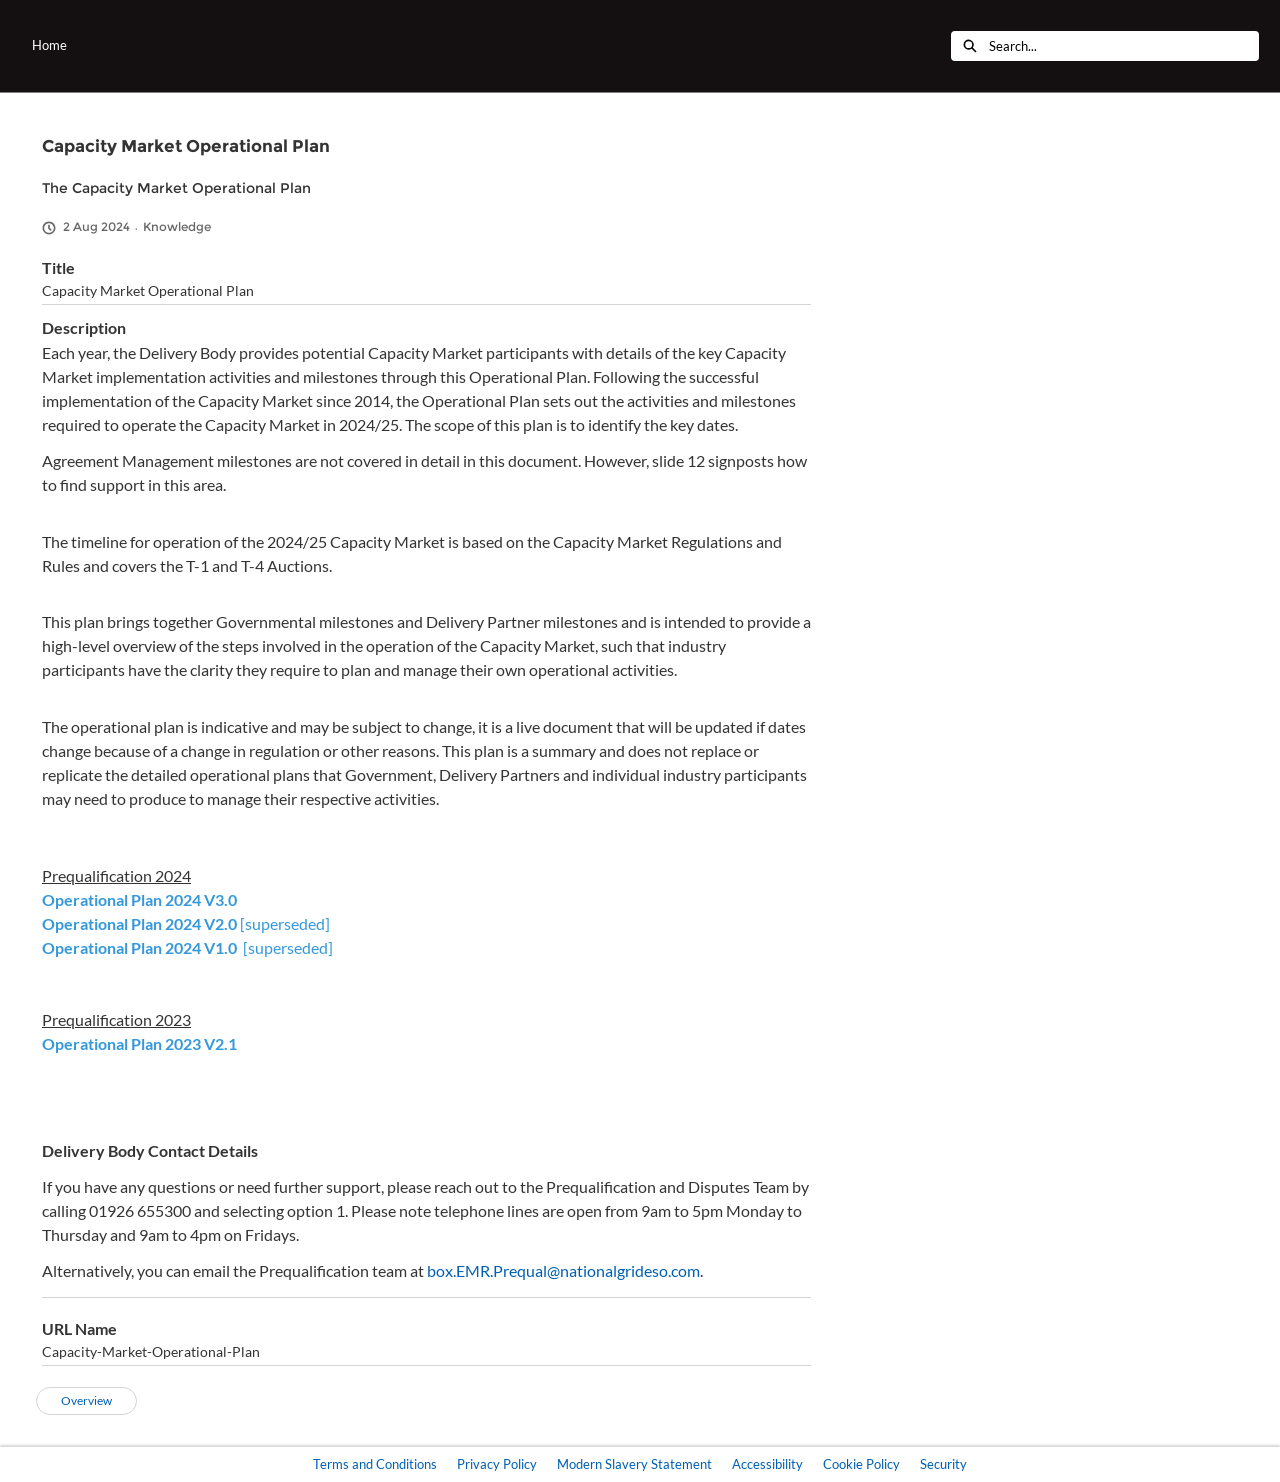

In [2]:
!pip install pyppeteer nest_asyncio

import asyncio
from pyppeteer import launch
import nest_asyncio
from IPython.display import Image

# Apply the nest_asyncio patch to allow nested event loops in Google Colab
nest_asyncio.apply()

async def scraper():
    # Launch the browser
    browser = await launch(headless=True, args=['--no-sandbox', '--disable-gpu'])
    page = await browser.newPage()

    # Set the viewport of the page
    await page.setViewport({"width": 1280, "height": 720})

    # Visit the target website
    await page.goto("https://emrdeliverybody.nationalgrideso.com/IG/s/article/Capacity-Market-Operational-Plan", timeout=60000)

    # Wait for the page content to load
    await page.waitForSelector("div.slds-rich-text-editor__output")

    # Grab a full-page screenshot of the web page
    screenshot_path = "full-page-screenshot.png"
    await page.screenshot(path=screenshot_path, fullPage=True)

    # Extract the main content
    content_element = await page.querySelector("div.slds-rich-text-editor__output")
    content_text = await content_element.getProperty("textContent")

    # Print the extracted content
    print(await content_text.jsonValue())

    # Close the browser
    await browser.close()

    return screenshot_path

# Run the scraper function and get the path of the screenshot
screenshot_path = await scraper()

# Display the screenshot in the notebook
Image(screenshot_path)




    
        
            
                
                    

                                
                            
                        
                            
                                Explore S&P Global
                            
                            
                                
                                    
                                                S&P Global
                                                S&P Dow Jones Indices
                                                S&P Global Market Intelligence
                                                S&P Global Mobility
                                                S&P Global Commodity Insights
                                                S&P Global Ratings
                                                S&P Global Sustainable1
                                    
                                    
                                         Close
                       

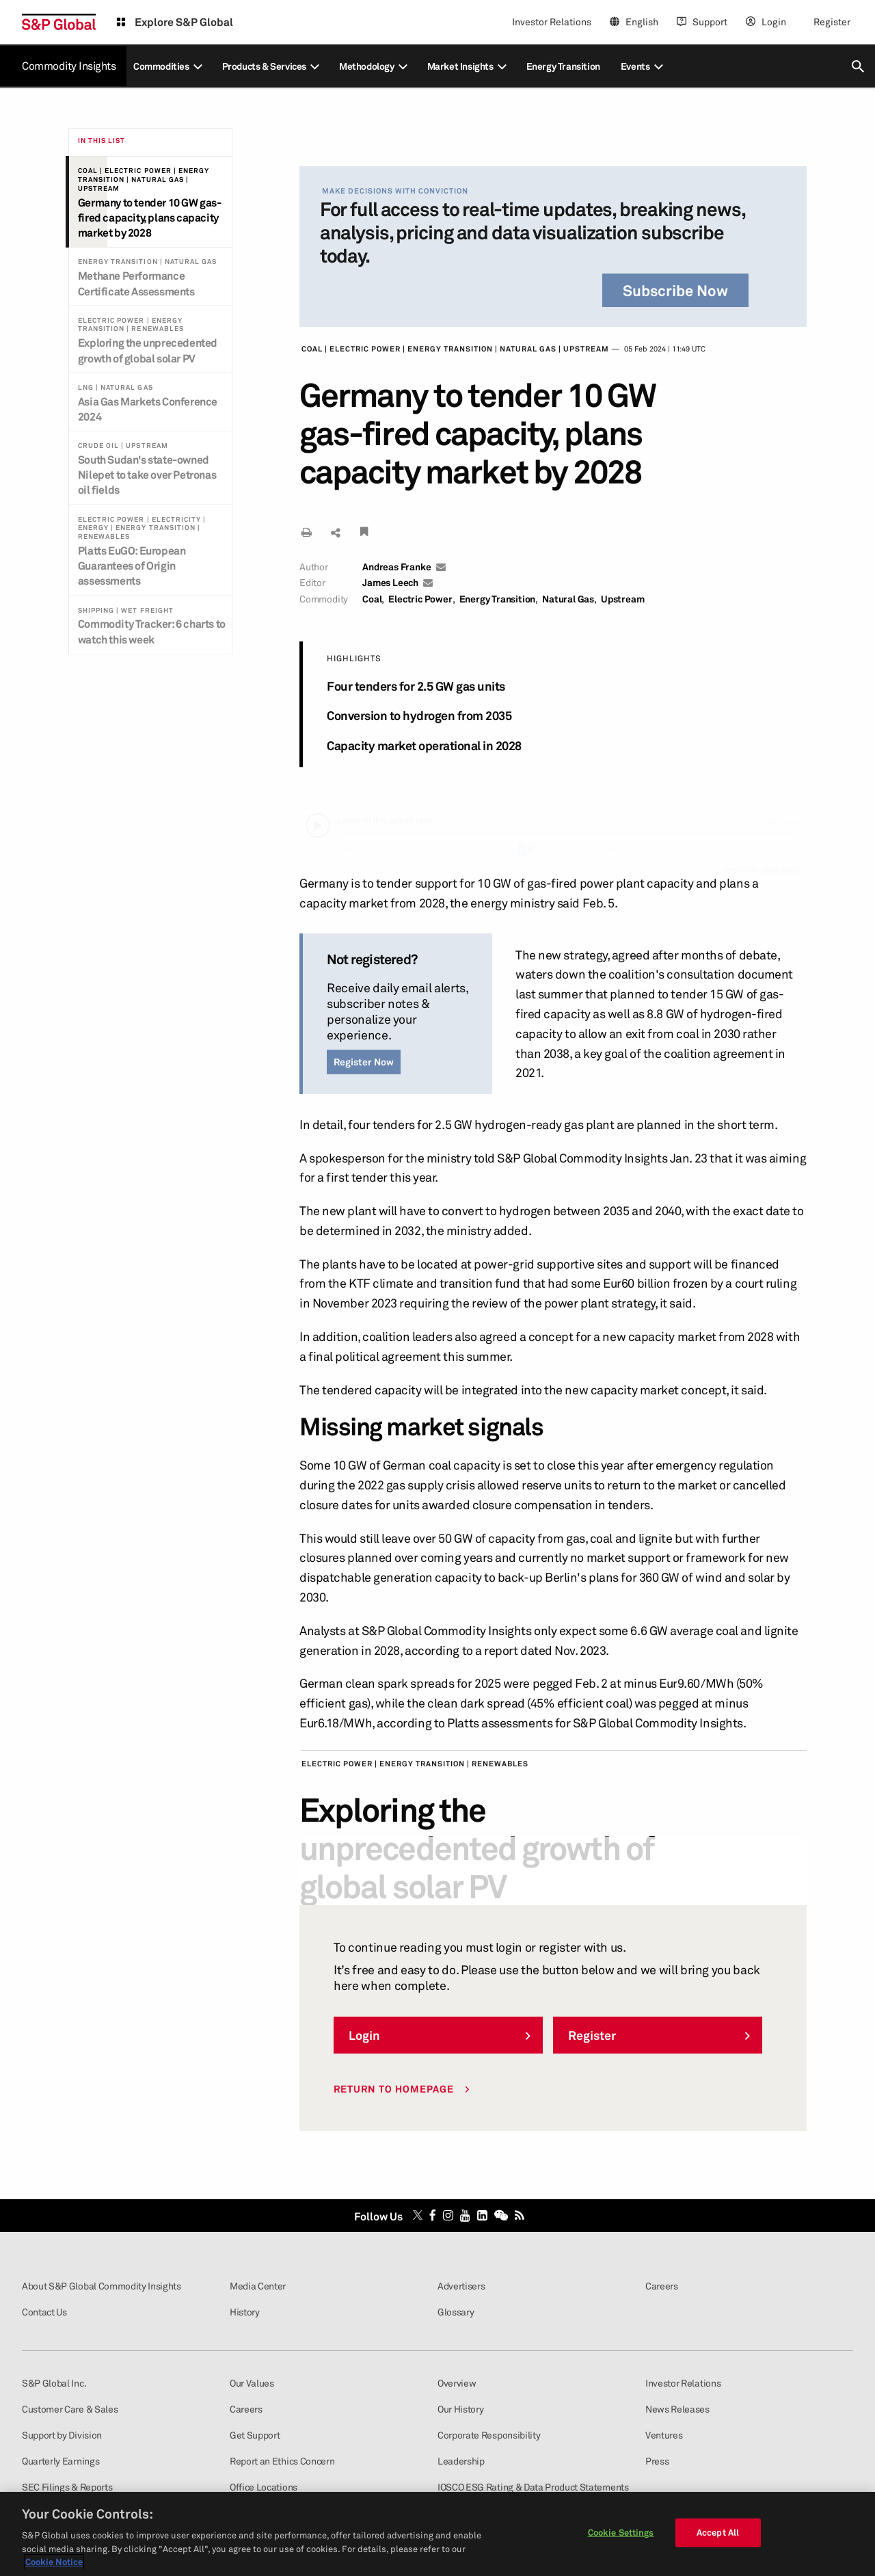

In [25]:
import asyncio
from pyppeteer import launch
import nest_asyncio
from IPython.display import Image, display

# Apply the nest_asyncio patch to allow nested event loops
nest_asyncio.apply()

async def scraper(url, block_resources=False, timeout=60000):
    try:
        # Launch the browser with the ability to block unnecessary resources
        browser = await launch(headless=True, args=['--no-sandbox', '--disable-gpu'])
        page = await browser.newPage()

        # Conditionally block resources like images and fonts
        if block_resources:
            await page.setRequestInterception(True)
            page.on('request', lambda request: asyncio.ensure_future(
                request.continue_() if request.resourceType in ['document', 'script', 'xhr', 'fetch', 'stylesheet'] else request.abort()
            ))

        # Set the viewport of the page
        await page.setViewport({"width": 1280, "height": 720})

        # Attempt to visit the target website with a given timeout
        await page.goto(url, timeout=timeout)

        # Wait for the page content to load
        await page.waitForSelector("body", {"timeout": 60000})

        # Adding a delay to ensure that JavaScript-rendered content is fully loaded
        await asyncio.sleep(5)

        # Try different ways to extract the main content
        content_text = ""
        for selector in ["article", "div", "p", "section"]:
            try:
                content_elements = await page.querySelectorAll(selector)
                if content_elements:
                    content_text = "\n".join(
                        [await (await element.getProperty("textContent")).jsonValue() for element in content_elements]
                    )
                    break
            except Exception as e:
                print(f"Error extracting content with selector {selector}: {e}")

        # If no content is extracted, default to an empty string
        if not content_text:
            content_text = "No content could be extracted."

        # Print the extracted content
        print(content_text)

        # Grab a full-page screenshot of the web page
        screenshot_path = "full-page-screenshot.png"
        await page.screenshot(path=screenshot_path, fullPage=True)

        # Close the browser
        await browser.close()

        return screenshot_path

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# URL of the website to scrape
url = "https://www.spglobal.com/commodityinsights/en/market-insights/latest-news/electric-power/020524-germany-to-tender-10-gw-gas-fired-capacity-plans-capacity-market-by-2028"

# Run the scraper function and get the path of the screenshot
screenshot_path = await scraper(url, block_resources=False, timeout=90000)

# Display the screenshot in the notebook
if screenshot_path:
    display(Image(screenshot_path))
else:
    print("Screenshot could not be taken.")


In [ ]:
import asyncio
from pyppeteer import launch
import nest_asyncio
import hashlib


nest_asyncio.apply()

async def fetch_page_content():

    browser = await launch(headless=True, args=['--no-sandbox', '--disable-gpu'])
    page = await browser.newPage()


    await page.setViewport({"width": 1280, "height": 720})


    await page.goto("https://emrdeliverybody.nationalgrideso.com/IG/s/article/Capacity-Market-Operational-Plan", timeout=60000)


    await page.waitForSelector("div.slds-rich-text-editor__output")


    content_element = await page.querySelector("div.slds-rich-text-editor__output")
    content_text = await content_element.getProperty("textContent")
    print(await content_text.jsonValue())

    content = await content_text.jsonValue()


    await browser.close()

    return content

def save_content(content, file_path='page_content.txt'):

    with open(file_path, 'w') as file:
        file.write(content)

def load_saved_content(file_path='page_content.txt'):

    try:
        with open(file_path, 'r') as file:
            return file.read()
    except FileNotFoundError:
        return None

def has_content_changed(new_content, old_content):

    return hashlib.md5(new_content.encode('utf-8')).hexdigest() != hashlib.md5(old_content.encode('utf-8')).hexdigest()

async def check_for_changes():

    current_content = await fetch_page_content()


    saved_content = load_saved_content()


    if saved_content is None:
        print("No saved content found, saving current content.")
        save_content(current_content)
    elif has_content_changed(current_content, saved_content):
        print("Content has changed!")
        save_content(current_content)

    else:
        print("No changes detected.")


await check_for_changes()


Each year, the Delivery Body provides potential Capacity Market participants with details of the key Capacity Market implementation activities and milestones through this Operational Plan. Following the successful implementation of the Capacity Market since 2014, the Operational Plan sets out the activities and milestones required to operate the Capacity Market in 2024/25. The scope of this plan is to identify the key dates.  

Agreement Management milestones are not covered in detail in this document. However, slide 12 signposts how to find support in this area.   

The timeline for operation of the 2024/25 Capacity Market is based on the Capacity Market Regulations and Rules and covers the T-1 and T-4 Auctions.   

This plan brings together Governmental milestones and Delivery Partner milestones and is intended to provide a high-level overview of the steps involved in the operation of the Capacity Market, such that industry participants have the clarity they require to plan and manag

In [ ]:
import asyncio
from pyppeteer import launch
import nest_asyncio
import hashlib

# Apply the nest_asyncio patch to allow nested event loops
nest_asyncio.apply()

async def fetch_page_content():
    # Launch the browser
    browser = await launch(headless=True, args=['--no-sandbox', '--disable-gpu'])
    page = await browser.newPage()

    # Set the viewport of the page
    await page.setViewport({"width": 1280, "height": 720})

    # Visit the target website
    await page.goto("https://emrdeliverybody.nationalgrideso.com/IG/s/article/Capacity-Market-Operational-Plan", timeout=60000)

    # Wait for the page content to load
    await page.waitForSelector("div.slds-rich-text-editor__output")

    # Extract all the years and corresponding report names
    year_report_dict = await page.evaluate('''() => {
        const years = {};
        document.querySelectorAll('a').forEach(link => {
            const yearMatch = link.textContent.match(/(20[0-9]{2})/);  // Match years like 2023, 2024, etc.
            if (yearMatch) {
                const year = yearMatch[1];
                if (!years[year]) {
                    years[year] = [];
                }
                years[year].push(link.textContent.trim());
            }
        });
        return years;
    }''')

    # Close the browser
    await browser.close()

    return year_report_dict

def save_content(content, file_path='page_content.txt'):
    with open(file_path, 'w') as file:
        file.write(content)

def load_saved_content(file_path='page_content.txt'):
    try:
        with open(file_path, 'r') as file:
            return file.read()
    except FileNotFoundError:
        return None

def has_content_changed(new_content, old_content):
    return hashlib.md5(new_content.encode('utf-8')).hexdigest() != hashlib.md5(old_content.encode('utf-8')).hexdigest()

async def check_for_changes():
    # Fetch the current content
    year_report_dict = await fetch_page_content()

    # Display the extracted report names grouped by year
    for year, reports in year_report_dict.items():
        print(f"Prequalification {year} Reports:")
        for report in reports:
            print(report)
        print("\n")

# Run the check_for_changes function
await check_for_changes()


Prequalification 2023 Reports:
Operational Plan 2023 V2.1


Prequalification 2024 Reports:
Operational Plan 2024 V3.0
Operational Plan 2024 V2.0
Operational Plan 2024 V1.0




In [ ]:
import asyncio
from pyppeteer import launch
import nest_asyncio
import hashlib
import json
from tabulate import tabulate

# Apply the nest_asyncio patch to allow nested event loops
nest_asyncio.apply()

async def fetch_page_content():
    # Launch the browser
    browser = await launch(headless=True, args=['--no-sandbox', '--disable-gpu'])
    page = await browser.newPage()

    # Set the viewport of the page
    await page.setViewport({"width": 1280, "height": 720})

    # Visit the target website
    await page.goto("https://emrdeliverybody.nationalgrideso.com/IG/s/article/Capacity-Market-Operational-Plan", timeout=60000)

    # Wait for the page content to load
    await page.waitForSelector("div.slds-rich-text-editor__output")

    # Extract all the years and corresponding report names
    year_report_dict = await page.evaluate('''() => {
        const years = {};
        document.querySelectorAll('a').forEach(link => {
            const yearMatch = link.textContent.match(/(20[0-9]{2})/);  // Match years like 2023, 2024, etc.
            if (yearMatch) {
                const year = yearMatch[1];
                if (!years[year]) {
                    years[year] = [];
                }
                years[year].push(link.textContent.trim());
            }
        });
        return years;
    }''')

    # Close the browser
    await browser.close()

    # Return the dictionary as a JSON string (for easier comparison and storage)
    return json.dumps(year_report_dict, indent=4)

def save_content(content, file_path='page_content.json'):
    with open(file_path, 'w') as file:
        file.write(content)

def load_saved_content(file_path='page_content.json'):
    try:
        with open(file_path, 'r') as file:
            return file.read()
    except FileNotFoundError:
        return None

def has_content_changed(new_content, old_content):
    return hashlib.md5(new_content.encode('utf-8')).hexdigest() != hashlib.md5(old_content.encode('utf-8')).hexdigest()

def print_tabulated_data(year_report_dict):
    # Prepare the data for tabulation
    rows = []
    for year, reports in year_report_dict.items():
        for report in reports:
            rows.append([year, report])

    # Print the table using tabulate
    print(tabulate(rows, headers=["Year", "Report Name"], tablefmt="pretty"))

async def check_for_changes():
    # Fetch the current content
    current_content = await fetch_page_content()

    # Load the previously saved content
    saved_content = load_saved_content()

    # Check if the content has changed
    if saved_content is None:
        print("No saved content found, saving current content.")
        save_content(current_content)
    elif has_content_changed(current_content, saved_content):
        print("Content has changed!")
        save_content(current_content)  # Update the saved content
        # Optionally, you can print the changes here
        print("New content:")
        print(current_content)
    else:
        print("No changes detected.")

    # Optionally, you can still print out the current structure
    year_report_dict = json.loads(current_content)
    print_tabulated_data(year_report_dict)

# Run the check_for_changes function
await check_for_changes()


No changes detected.
+------+----------------------------+
| Year |        Report Name         |
+------+----------------------------+
| 2023 | Operational Plan 2023 V2.1 |
| 2024 | Operational Plan 2024 V3.0 |
| 2024 | Operational Plan 2024 V2.0 |
| 2024 | Operational Plan 2024 V1.0 |
+------+----------------------------+
